In [3]:
import pandas as pd
import chardet

import pandas as pd
df = pd.read_csv('spam 5.csv')
df.sample(5) 


,v1,v2
618,spam,"""Tải ứng dụng du lịch của chúng tôi để nhận ng..."
495,spam,Chúc mừng bạn đã giành được chuyến du lịch miễ...
1021,ham,"""Thư mời tham gia buổi hội thảo về giáo dục. C..."
509,spam,Nhanh tay nhận vé xem phim miễn phí cho 2 ngườ...
70,ham,"Chào bạn, tôi đã nhận được bản báo cáo của bạn..."


In [2]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham    469    468  Lên kế hoạch cho cuộc họp tiếp theo. Đừng quên...    2
spam   566    565  Chúng tôi gửi đến bạn món quà trị giá 100 triệ...    2

In [3]:
df_spam = df[df['v1'] == 'spam']
df_spam.shape

(566, 2)

In [4]:
df_ham = df[df['v1'] == 'ham']
df_ham.shape

(469, 2)

In [5]:
df_spam_downsampled = df_spam.sample(df_ham.shape[0])
df_spam_downsampled.shape

(469, 2)

In [6]:
import pandas as pd
df_balanced = pd.concat([df_ham, df_spam_downsampled])
df_balanced.shape

(938, 2)

In [7]:
df_balanced.sample(5)

,v1,v2
619,spam,"""Ứng dụng mới giúp bạn tìm bạn bè quốc tế. Cài..."
193,spam,Mua ngay các sản phẩm của chúng tôi và nhận nh...
118,spam,Hãy tham gia cuộc thi của chúng tôi để nhận gi...
472,spam,Nhanh tay nhận thẻ quà tặng trị giá 1 triệu VN...
404,ham,Cuộc họp vào tuần tới sẽ tập trung vào việc tr...


In [8]:
if 'v1' in df_balanced.columns:
    df_balanced['label_num'] = df_balanced['v1'].map({'ham':0, 'spam':1})
    print(df_balanced.sample(10))
else:
    print("khum cóa")

       v1                                                 v2  label_num
236   ham   "Lịch họp sáng mai đã được xác nhận. Đừng quê...          0
216  spam  Mua 2 tặng 1 cho tất cả các mặt hàng điện thoạ...          1
393  spam  Tham gia ngay để nhận thẻ quà tặng trị giá 500...          1
275   ham  Cảm ơn bạn đã gửi lại báo cáo. Chúng ta sẽ thả...          0
186  spam  Chỉ cần gửi tin nhắn để nhận ngay phần thưởng ...          1
328   ham  Lên kế hoạch cho cuộc họp tuần sau, đừng quên ...          0
656  spam  "Thông báo khẩn cấp! Tài khoản của bạn sẽ bị k...          1
381  spam  Chúc mừng bạn đã chiến thắng trong cuộc thi! B...          1
623  spam  "Ứng dụng hỗ trợ kinh doanh online đã ra mắt! ...          1
771  spam  "Bạn có hóa đơn chưa thanh toán. Nhấn vào đây ...          1


In [9]:
import pandas as pd
import numpy as np
import re
from pyvi import ViTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
with open('vietnamesestopwords.txt','r',encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

In [11]:
tudonspam = Counter()
tudonham = Counter()
tughepspam = Counter()
tughepham = Counter()

def preprocess_and_tokenize(text, update_vocab=False, label=None):

    text = text.lower()
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.strip()
    tokens = ViTokenizer.tokenize(text).split()
    tokens = [word for word in tokens if word not in stopwords]

    if update_vocab and label is not None:
        for token in tokens:
            if '_' in token:  # Từ ghép
                if label == 1:
                    tughepspam[token] += 1
                    print('đã thêm từ ghép spam vào từ điển')
                else:
                    if token not in tughepspam:
                        tughepham[token] += 1
                        print('đã thêm từ ghép ham vào từ điển')
            else:  # Từ đơn
                if label == 1:
                    tudonspam[token] += 1
                    print('đã thêm từ đơn spam vào từ điển')
                else:
                    if token not in tudonspam:
                        tudonham[token] += 1
                        print('đã thêm từ đơn ham vào từ điển')
                
    return ' '.join(tokens)

df_balanced['v1'] = df_balanced['v1'].map({'spam': 1, 'ham': 0}) 
#data['tokens'] = data.apply(lambda row: preprocess_and_tokenize(row['v2'], label=row['v1'], update_vocab=True), axis=1)
df_balanced['tokens'] = df_balanced.apply(lambda row: preprocess_and_tokenize(row['v2'], update_vocab=True, label=row['v1']),axis=1)
print("Từ đơn Spam:", tudonspam)
print("Từ đơn Ham:", tudonham)
print("Từ ghép Spam:", tughepspam)
print("Từ ghép Ham:", tughepham)

đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ đơn ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào từ điển
đã thêm từ ghép ham vào 

In [12]:
df_balanced.shape

(938, 4)

In [13]:
import json 
import json

# Lưu từ điển
with open("tudonspam.json", "w", encoding="utf-8") as f:
    json.dump(dict(tudonspam), f, ensure_ascii=False, indent=4)

with open("tudonham.json", "w", encoding="utf-8") as f:
    json.dump(dict(tudonham), f, ensure_ascii=False, indent=4)

with open("tughepspam.json", "w", encoding="utf-8") as f:
    json.dump(dict(tughepspam), f, ensure_ascii=False, indent=4)

with open("tughepham.json", "w", encoding="utf-8") as f:
    json.dump(dict(tughepham), f, ensure_ascii=False, indent=4)


In [14]:
df_balanced['text_clean'] = df_balanced['v2'].apply(preprocess_and_tokenize)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
phobert_model = TFAutoModel.from_pretrained("vinai/phobert-base")

inputs = tokenizer(list(df_balanced['text_clean']), padding=True, truncation=True, max_length=128, return_tensors="tf")

outputs = phobert_model(**inputs)
features = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy()
df_balanced['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})
df_balanced['features'] = list(features)
print('dactrung:',features)
print('dataframe:\n',df_balanced.sample(5))

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


dactrung: [[-4.1668627e-01  1.8929327e-01 -5.0877318e-02 ...  3.6512941e-01
   6.3237965e-02  3.5236698e-01]
 [-3.1832653e-01  1.3188325e-01 -3.2343972e-01 ... -2.1357262e-01
   1.2501216e-01  5.4382461e-01]
 [-4.8867438e-02  2.6065183e-01  9.9508382e-02 ... -2.4126723e-01
  -3.7797898e-01 -3.9327592e-01]
 ...
 [ 9.4668336e-02  3.0531406e-01 -2.7377167e-01 ... -1.9983825e-01
  -2.0444988e-01  3.6046851e-01]
 [ 1.5059976e-02  3.1494287e-01 -2.4921730e-02 ... -1.8315463e-01
  -6.9418669e-02 -9.2078112e-03]
 [-1.5037901e-04  5.4369903e-01 -6.8568818e-02 ...  3.2028768e-02
  -2.4809229e-01  9.5017910e-02]]
dataframe:
      v1                                                 v2  label_num  \
858   1  "Tải ngay ứng dụng mới để nhận 100.000 VNĐ miễ...          1   
642   0  "Chúng tôi vừa ra mắt ứng dụng kết nối giữa do...          0   
229   1  Tham gia ngay chương trình giảm giá đặc biệt, ...          1   
93    0  Tôi đã nhận được thư mời tham gia hội thảo, cả...          0   
609   0  "Ứng

In [15]:

def tinh(text, tudonspam, tudonham, tughepspam, tughepham):
    from collections import Counter
    tokens = text.split() 
    freq_vector = []
    spam_count = sum(tudonspam.get(token, 0) for token in tokens)  
    ham_count = sum(tudonham.get(token, 0) for token in tokens)    
    spam_phrases_count = sum(tughepspam.get(token, 0) for token in tokens) 
    ham_phrases_count = sum(tughepham.get(token, 0) for token in tokens)  

    freq_vector.extend([spam_count, ham_count, spam_phrases_count, ham_phrases_count])
    return freq_vector

# Áp dụng tính tần suất cho từng email
df_balanced['frequency_features'] = df_balanced['text_clean'].apply(
    lambda x: tinh(x, tudonspam, tudonham, tughepspam, tughepham)
)


In [ ]:
import numpy as np

features_frequencies = np.array(df_balanced['frequency_features'].tolist())
features_combined = np.hstack((features, features_frequencies))

y = df_balanced['label_num'].values

In [17]:
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_combined, y, test_size=0.2, random_state=101)


In [18]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['log2', 'sqrt',None]
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {
"n_estimators": n_estimators,
"max_features" : max_features,
"max_depth" : max_depth,
"min_samples_split" : min_samples_split,
"min_samples_leaf" : min_samples_leaf,
"bootstrap" : bootstrap,
}
print(param_grid)


{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['log2', 'sqrt', None], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [19]:
random_search = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = param_grid,
    n_iter = 50,
    cv = 5,
    verbose=2,
    random_state=42,
    n_jobs = -1,
    scoring = 'f1',
)
random_search.fit(X_train, y_train)
print("RandomizedSearchCV đã tối ưu thành công")
best_params = random_search.best_params_
print("best parameters: ", best_params)
best_model = random_search.best_estimator_



Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV đã tối ưu thành công
best parameters:  {'n_estimators': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'bootstrap': True}


In [20]:
X_test

array([[ 8.87980312e-03, -2.22046643e-01, -1.07917428e-01, ...,
         3.00000000e+02,  2.00000000e+00,  2.15000000e+02],
       [-7.67860860e-02,  1.26504347e-01, -2.48706535e-01, ...,
         2.80000000e+01,  1.81000000e+02,  1.78000000e+02],
       [ 9.51033644e-03,  4.95556653e-01, -1.61130994e-03, ...,
         8.40000000e+01,  1.30000000e+01,  3.90000000e+01],
       ...,
       [-1.63764611e-01,  1.80167735e-01,  5.43280691e-02, ...,
         2.50000000e+01,  2.18000000e+02,  4.20000000e+01],
       [-7.38791004e-02,  3.21437657e-01, -1.84866756e-01, ...,
         3.00000000e+00,  2.57000000e+02,  6.00000000e+00],
       [-2.71697819e-01,  2.28828073e-01, -4.83310133e-01, ...,
         1.46000000e+02,  2.10000000e+01,  1.05000000e+02]])

In [21]:
X_train.data


Confusion Matrix:
 [[93  9]
 [ 5 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.90      0.94      0.92        86

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188



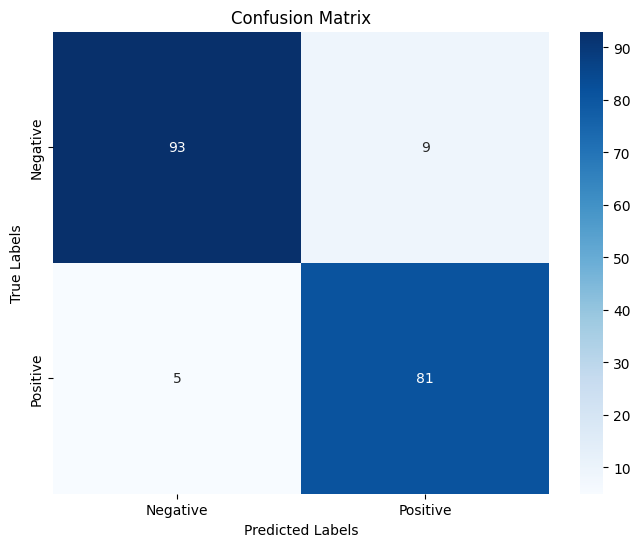

In [22]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [23]:
#predict
import pickle
pickle.dump(model, open("randomforest.pkl", "wb"))

NameError: name 'model' is not defined